# Alican Bayındır
# ELM 472 - ODEV4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x,y)=np.load('data.npy')

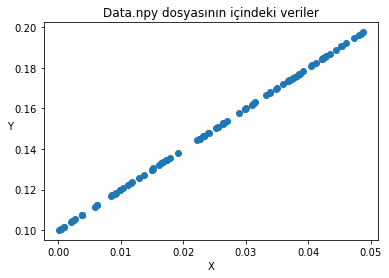

In [3]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y", rotation = 0)
plt.title("Data.npy dosyasının içindeki veriler")
plt.show()

In [4]:
# Regresyon katsayılarını hesaplayan
# analitik fonksiyon
def analyticsMethod(x, y):
    ssxy = (x * y).sum() - (len(x) * x.mean() * y.mean())
    ssxx = ((x - x.mean()) ** 2).sum()
    m = ssxy / ssxx
    c = y.mean() - (m * x.mean())
    return [m,c]

m, c = analyticsMethod(x, y)
# printing both the values
print(f'M (Theta 0) değeri: {m}')
print(f'C (Theta 1) değeri: {c}')

M (Theta 0) değeri: 1.9999999999999982
C (Theta 1) değeri: 0.10000000000000006


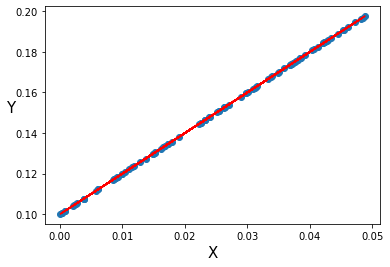

In [5]:
# M ve C ile doğruyu çizdirelim
# Scatter plot üzerinde regresyon doğrusu
plt.scatter(x, y)
plt.plot(x, (x * m + c), color = "red")
plt.xlabel("X", fontsize = 15)
plt.ylabel("Y", fontsize = 15, rotation = 0)
plt.show()

In [6]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1/(1+np.exp(-x))

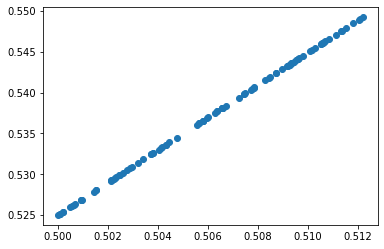

In [8]:
x = sigmoid(x)
y = sigmoid(y)

plt.scatter(x,y)

In [9]:
def costFunction(theta, X, y):
    """
    Bu fonksiyonda cost hesaplanır
    x ve y tanımlanan değişkenlerdir
    theta = katsayıların vektörüdür
    """
    m = len(y)
    # Cost hesaplama
    c = (1 / 2 * m) * np.sum(np.square((X.dot(theta)) - y))
    return c

In [10]:
def gradient_descent_1(X, y, theta, alpha, iterations):
    """
    Fonksiyon thate ve cost fonksiyonundan çıkan
    tüm değerleri döndürür
    theta = regresyon katsayılarının matrisi
    alpha = learning rate / öğrenme hızı
    iteration = iterasyon sayısı
    """
    # Bir değişkendeki değer sayısı
    m = len(y)

    # Katsayılar ve cost fonksiyondan çıkanlar
    # bir matrise yerleştirilir
    thetas = np.zeros((iterations, 2))
    costs = np.zeros(iterations)

    # Her bir iterasyonda katsayılar hesaplanır
    for i in range(iterations):
        theta = theta - (1 / m) * alpha * (X.T.dot((X.dot(theta)) - y))
        thetas[i, :] = theta.T
        costs[i] = costFunction(theta, X, y)
    return theta, thetas, costs

In [40]:
# Learning Rate
alpha = 0.01

# İterasyon sayısı
iterations = 10000

# Rasgele katsayı başlangıç değeri
theta = np.random.randn(2, 1)

# Her bir özellik için sabit hata payı eklenir
X_bias = np.c_[np.ones((len(x), 1)), x]

# Gradient Decent fonksiyonun çalıştırılması
theta, thetas, costs = gradient_descent_1(X_bias, y, theta, alpha, iterations)

In [41]:
# Sonuçlar
print(f"Theta 0 (m) değeri: {theta[0][0]}")
print(f"Theta 1 değeri: {theta[1][0]}")
print(f"Maliyet/Cost/MSE(L2 Loss) değeri: {costs[-1]}")

Theta 0 (m) değeri: -0.3622994895521668
Theta 1 değeri: 1.7771882815517615
Maliyet/Cost/MSE(L2 Loss) değeri: 0.002922114757344909


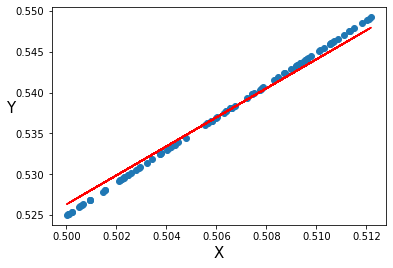

In [45]:
plt.scatter(x, y)
plt.plot(x, (x * theta[1][0] + theta[0][0]), color = "red")
plt.xlabel("X", fontsize = 15)
plt.ylabel("Y", fontsize = 15, rotation = 0)
plt.show()

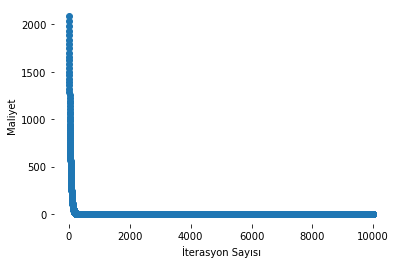

In [47]:
# Scatter plot ile analiz
iterations = np.linspace(0, 10000, 10000)
plt.scatter(iterations,costs)
plt.xlabel("İterasyon Sayısı")
plt.ylabel("Maliyet")
plt.box(None)
plt.show()